In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from invisible_cities.io.dst_io import load_dst
from invisible_cities.core.core_functions import in_range
import invisible_cities.core.fit_functions as fitf

from invisible_cities.icaro.hst_functions import *

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [3]:
run_number = 5798

In [4]:
zrange =  50,  550
erange = 2e3, 16e3
zbins = np.linspace(*zrange, 11)
ebins = np.linspace(*erange, 51)

In [5]:
path     = "/Users/Gonzalo/github/NEXTdata/RunIV/"
filename = f"kdst_{run_number}_v0.9.6-29-g2ec1284_20180607_kr.h5"
filename = os.path.join(path, filename)

In [6]:
dst = load_dst(filename, group="DST", node="Events")
dst.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,Zrms,X,Y,R,Xrms,Yrms
0,3,1.528402e+09,0,1,250.0,1.135105,8.935164,126275.0,11.637125,1034.840576,...,653488.3750,21,527.213375,527.213375,2.289827,114.848643,-84.399829,142.525583,64.482232,43.345662
1,6,1.528402e+09,0,1,125.0,2.301476,8.661383,557050.0,6.333938,3081.854004,...,652513.8125,14,95.463813,95.463813,1.039546,-26.074087,-90.937387,94.601619,8.060034,7.898523
2,10,1.528402e+09,0,1,125.0,1.287131,6.067009,490175.0,6.703750,1070.998413,...,652483.1875,12,162.308188,162.308188,1.444706,20.901106,192.752810,193.882702,8.624205,6.815156
3,11,1.528402e+09,0,1,175.0,0.836507,4.633831,419425.0,7.653500,2268.949219,...,652503.5625,18,233.078563,233.078563,1.553440,-99.371739,-89.834974,133.959192,12.930160,18.578508
4,14,1.528402e+09,0,1,125.0,1.809367,7.917607,478650.0,7.564250,2621.760986,...,652504.3125,19,173.854312,173.854312,1.317993,95.172768,14.510983,96.272656,31.649308,20.157120


In [7]:
T  = dst.time
T  = T - T.min()
T /= 60

X  = dst.X  .values
Y  = dst.Y  .values
Z  = dst.Z  .values
R  = dst.R  .values
E  = dst.S2e.values

In [8]:
xmin, xmax = -30, 30
ymin, ymax = -30, 30
xysel = in_range(X, xmin, xmax) & in_range(Y, ymin, ymax)

285
324
267
262
250
205
223
184
157
158


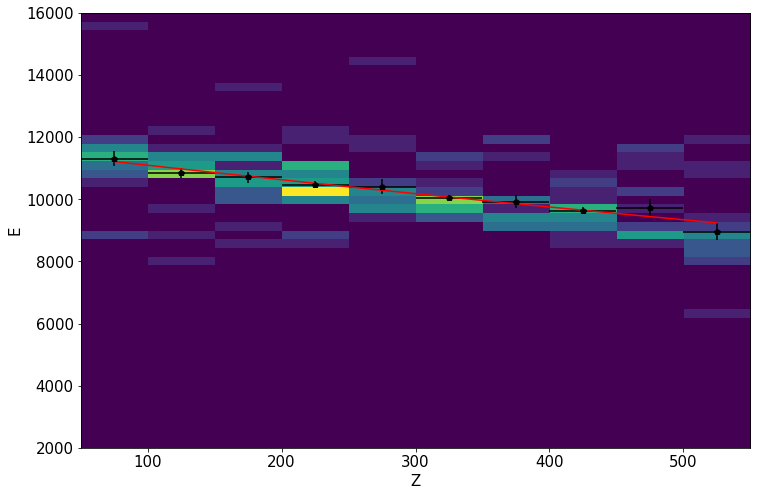

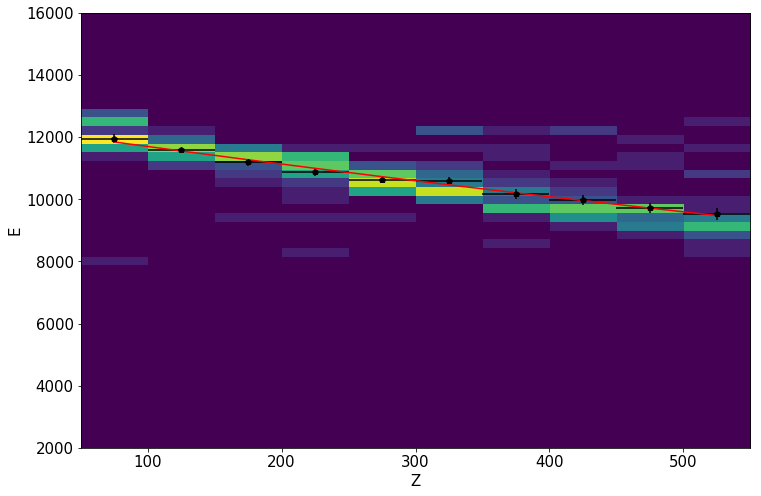

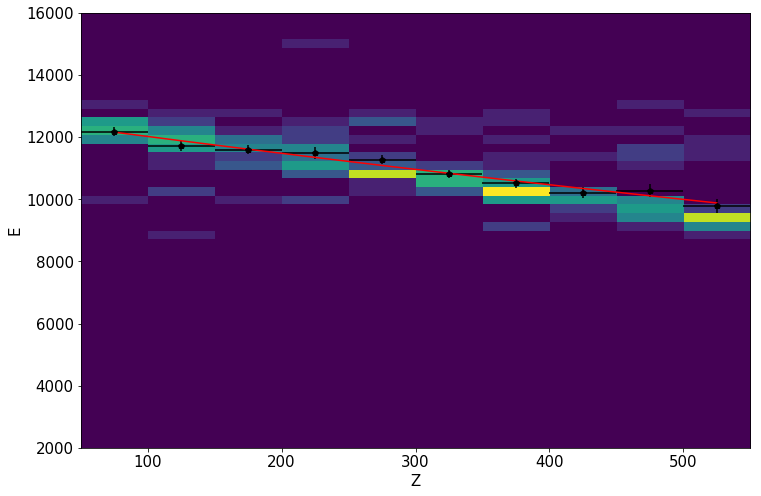

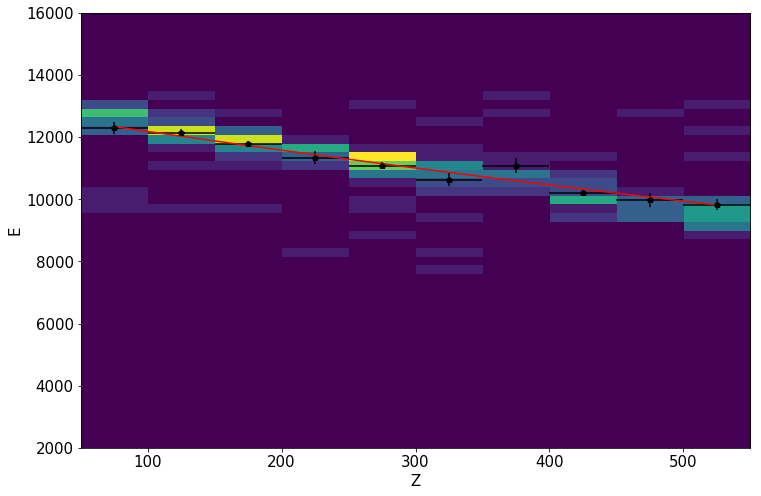

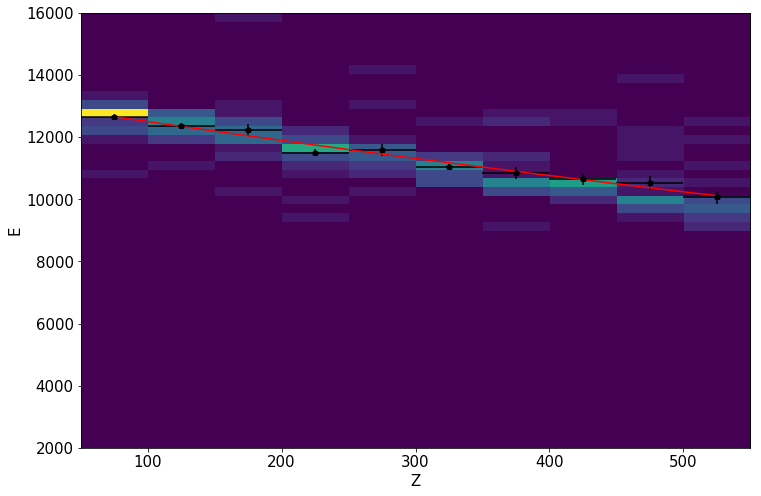

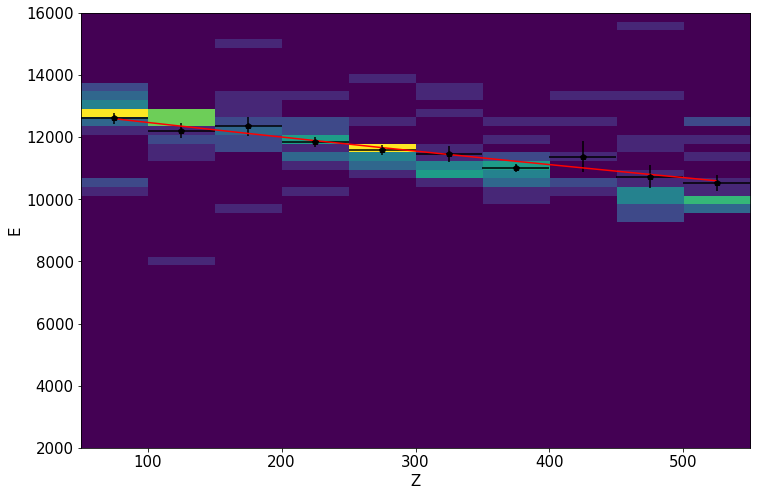

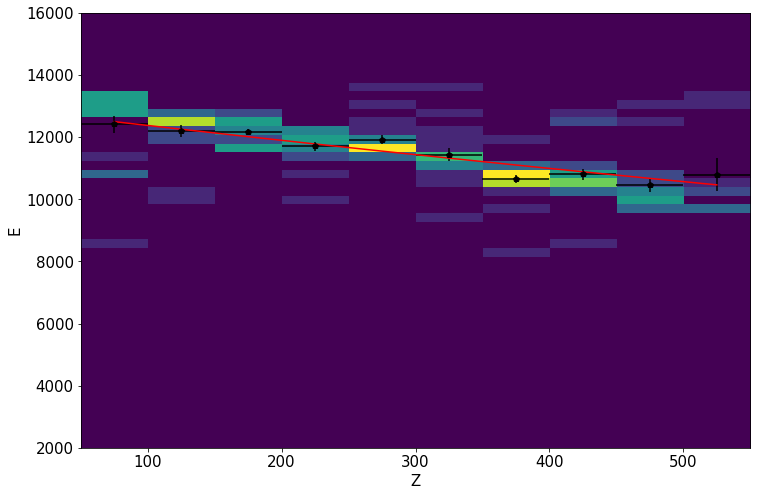

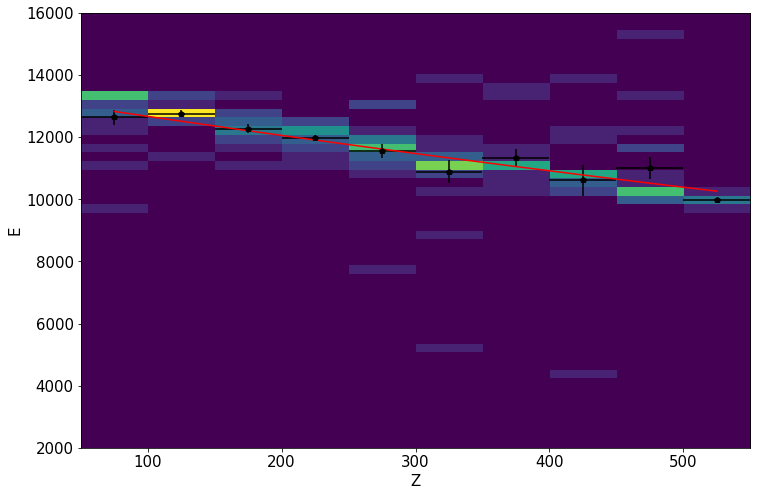

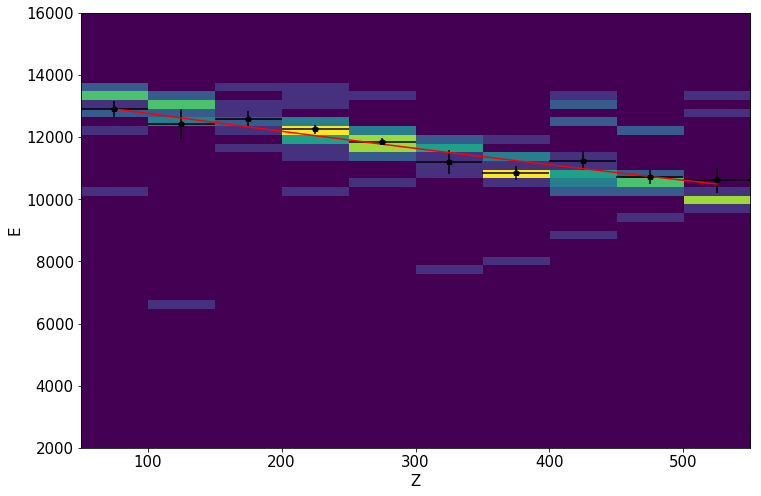

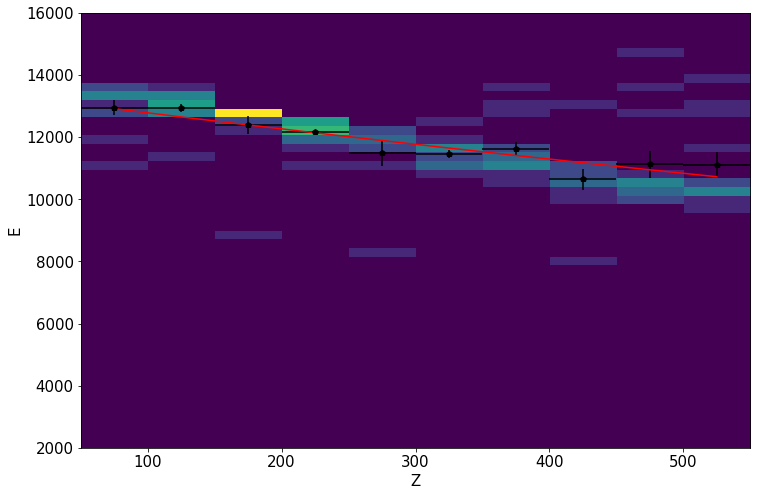

In [13]:
n_time_slices = 10
time_slices = np.linspace(T.min(), T.max(), n_time_slices + 1)
draw = True
lifetimes   = []
lifetimes_u = []
for tmin, tmax in zip(time_slices[:-1], time_slices[1:]):
    sel  = in_range(T, tmin, tmax) & xysel
    print(np.count_nonzero(sel))
    z, e = Z[sel], E[sel]
    x, y, yu = fitf.profileX(z, e, 10, xrange=zrange, yrange=erange)
    xu = np.diff(x)[0] / 2
    f = fitf.fit(fitf.expo, x, y, (1e4, -1e3))
    if draw:
        hist2d(z, e, (zbins, ebins))
        plt.errorbar(x, y, yu, xu, fmt="kp")
        plt.plot(x, f.fn(x), "r-")
        labels("Z", "E")
    lifetimes  .append(-f.values[1])
    lifetimes_u.append( f.errors[1])

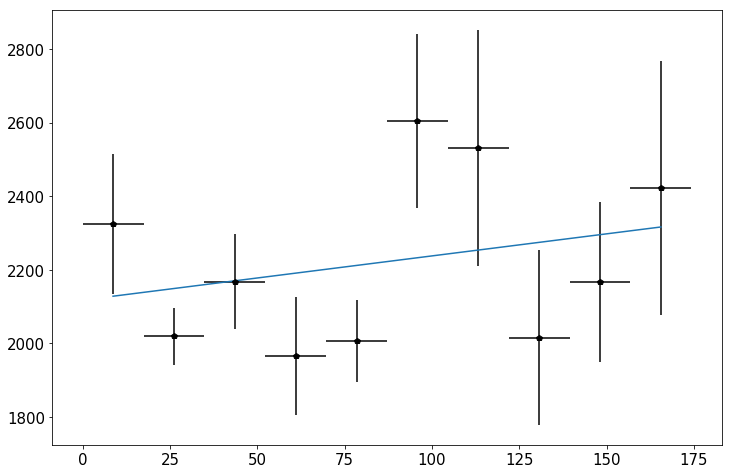

In [14]:
x  = shift_to_bin_centers(time_slices)
y  = lifetimes
yu = lifetimes_u
xu = np.diff(time_slices) / 2
f = fitf.fit(fitf.polynom, x, y, (1e3, 1e-3))

plt.errorbar(x, y, yu, xu, "kp")
plt.plot(x, f.fn(x))

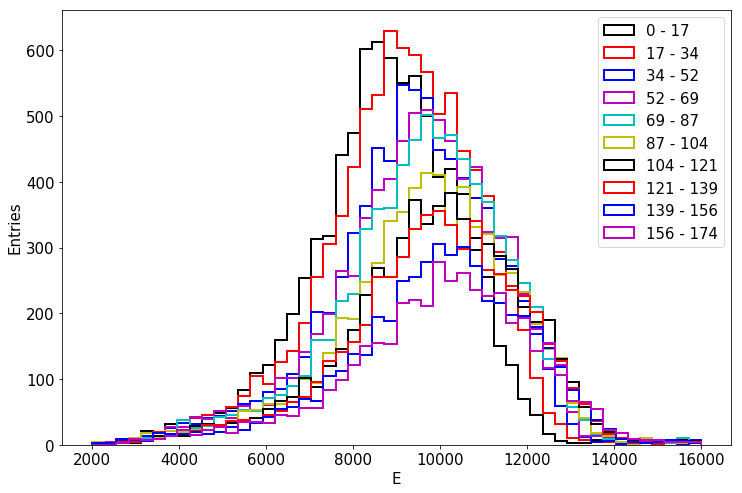

In [19]:
n_time_slices = 10
time_slices = np.linspace(T.min(), T.max(), n_time_slices + 1)
draw   = True
colors = ["k", "r", "b", "m", "c", "y"] * 10
means  = []
for tmin, tmax, color in zip(time_slices[:-1], time_slices[1:], colors):
    sel  = in_range(T, tmin, tmax)

    y, x, _ = hist(E[sel], ebins, label=str(int(tmin)) + " - " + str(int(tmax)), lw=2, histtype='step', ec=color, new_figure=False)
    
    means.append(np.average(x, weights=y))
plt.legend()
labels("E", "Entries")

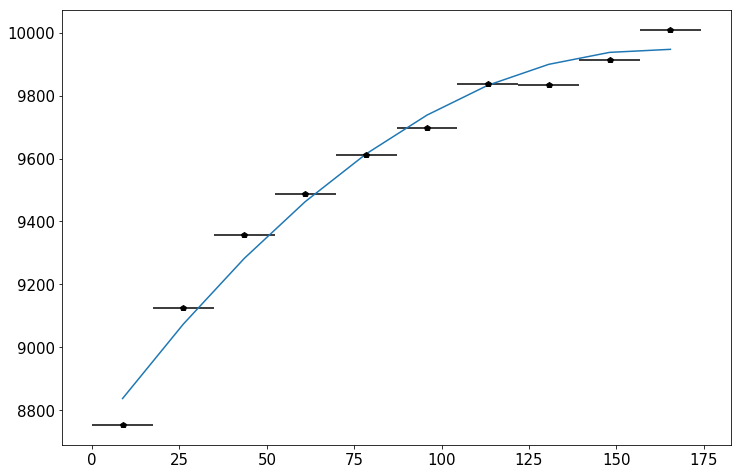

In [20]:
x  = shift_to_bin_centers(time_slices)
y  = means
yu = None
xu = np.diff(time_slices) / 2
f = fitf.fit(fitf.polynom, x, y, (1e3, 1e-3, 1e-6))

plt.errorbar(x, y, yu, xu, "kp")
plt.plot(x, f.fn(x))